In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# File loading
df  = pd.read_csv(r'datasets/hospital_v2.csv')

In [3]:
df.head()

,name
0,คลินิกกรุงเทพพัทยาสาขาจอมเทียน
1,คลินิกกรุงเทพระยองสาขาบ่อวิน
2,คลินิกกรุงเทพระยองสาขาบ้านฉาง
3,คลินิกกรุงเทพระยองสาขาปลวกแดง
4,คลินิกไทยอินเตอร์การแพทย์(เกาะพงัน)


In [4]:
print(df.shape)
df.dropna(axis=0,how='any')
print(df.shape)

(1290, 1)
(1290, 1)


In [5]:
lines = [x for x in df['name'] if type(x) == type('a') ]
print("Line Count:",len(lines))
print(lines[:4])

Line Count: 1290
['คลินิกกรุงเทพพัทยาสาขาจอมเทียน', 'คลินิกกรุงเทพระยองสาขาบ่อวิน', 'คลินิกกรุงเทพระยองสาขาบ้านฉาง', 'คลินิกกรุงเทพระยองสาขาปลวกแดง']


In [6]:
# Preprocessing
import re
def process(sent):
    sent=sent.lower()
    sent=re.sub(r'[^0-9a-zA-Z ]','',sent)
    sent=sent.replace('\n','')
    return sent   

In [7]:
temp = []
for line in lines:
    temp+= [ x for x in line.split() ]

In [8]:
lines = list(set(temp))

In [9]:
lines[0:10]

['โรงพยาบาลดาเนินสะดวก',
 'สถาบันพยาธิวิทยา',
 'โรงพยาบาลหัวไทร',
 'โรงพยาบาลคลองตัน',
 'โรงพยาบาลขามทะเลสอ',
 'โรงพยาบาลองครักษ์',
 'โรงพยาบาลสมเด็จพระยุพราชท่าบ่อ',
 'โรงพยาบาลชัยภูมิราม',
 'โรงพยาบาลโพธิ์ตาก',
 'โรงพยาบาลคลองลาน']

In [10]:
from pythainlp import thai_letters

In [12]:
label_map_0 = ["0","1","2","3","4","5","6","7","8","9","-",".","/","(",")","\"","&"]
label_map_1 = list(thai_letters)

In [13]:
char_set = label_map_0+label_map_1

In [14]:
char2int = { char_set[x]:x for x in range(len(char_set)) }
int2char = { char2int[x]:x for x in char_set }

In [15]:
print(char2int)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '-': 10, '.': 11, '/': 12, '(': 13, ')': 14, '"': 15, '&': 16, 'ก': 17, 'ข': 18, 'ฃ': 19, 'ค': 20, 'ฅ': 21, 'ฆ': 22, 'ง': 23, 'จ': 24, 'ฉ': 25, 'ช': 26, 'ซ': 27, 'ฌ': 28, 'ญ': 29, 'ฎ': 30, 'ฏ': 31, 'ฐ': 32, 'ฑ': 33, 'ฒ': 34, 'ณ': 35, 'ด': 36, 'ต': 37, 'ถ': 38, 'ท': 39, 'ธ': 40, 'น': 41, 'บ': 42, 'ป': 43, 'ผ': 44, 'ฝ': 45, 'พ': 46, 'ฟ': 47, 'ภ': 48, 'ม': 49, 'ย': 50, 'ร': 51, 'ล': 52, 'ว': 53, 'ศ': 54, 'ษ': 55, 'ส': 56, 'ห': 57, 'ฬ': 58, 'อ': 59, 'ฮ': 60, 'ฤ': 61, 'ฦ': 62, 'ะ': 63, 'ั': 64, 'า': 65, 'ำ': 66, 'ิ': 67, 'ี': 68, 'ึ': 69, 'ื': 70, 'ุ': 71, 'ู': 72, 'เ': 73, 'แ': 74, 'โ': 75, 'ใ': 76, 'ไ': 77, 'ๅ': 78, '็': 79, '่': 80, '้': 81, '๊': 82, '๋': 83, 'ฯ': 84, 'ๆ': 85, 'ฺ': 86, '์': 87, 'ํ': 88, '๎': 89}


In [16]:
print(int2char)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '-', 11: '.', 12: '/', 13: '(', 14: ')', 15: '"', 16: '&', 17: 'ก', 18: 'ข', 19: 'ฃ', 20: 'ค', 21: 'ฅ', 22: 'ฆ', 23: 'ง', 24: 'จ', 25: 'ฉ', 26: 'ช', 27: 'ซ', 28: 'ฌ', 29: 'ญ', 30: 'ฎ', 31: 'ฏ', 32: 'ฐ', 33: 'ฑ', 34: 'ฒ', 35: 'ณ', 36: 'ด', 37: 'ต', 38: 'ถ', 39: 'ท', 40: 'ธ', 41: 'น', 42: 'บ', 43: 'ป', 44: 'ผ', 45: 'ฝ', 46: 'พ', 47: 'ฟ', 48: 'ภ', 49: 'ม', 50: 'ย', 51: 'ร', 52: 'ล', 53: 'ว', 54: 'ศ', 55: 'ษ', 56: 'ส', 57: 'ห', 58: 'ฬ', 59: 'อ', 60: 'ฮ', 61: 'ฤ', 62: 'ฦ', 63: 'ะ', 64: 'ั', 65: 'า', 66: 'ำ', 67: 'ิ', 68: 'ี', 69: 'ึ', 70: 'ื', 71: 'ุ', 72: 'ู', 73: 'เ', 74: 'แ', 75: 'โ', 76: 'ใ', 77: 'ไ', 78: 'ๅ', 79: '็', 80: '่', 81: '้', 82: '๊', 83: '๋', 84: 'ฯ', 85: 'ๆ', 86: 'ฺ', 87: '์', 88: 'ํ', 89: '๎'}


In [17]:
count = len(char_set)
codes = ['\t' ,'\n']

In [18]:
for i in range(len(codes)):
    code = codes[i]
    char2int[code]=count
    int2char[count]=code
    count+=1

In [19]:
#thresh - 0 to 1
import random
def gen_gibberish(line,thresh=0.2):
    times = int(random.randrange(1,len(line)) * thresh)
    '''
    Types of replacement:
        1.Delete random character.
        2.Add random character.
        3.Replace a character.
        4.Combination?
    '''
    while times!=0:
        # try to gen noise length times...
        times-=1
        val = random.randrange(0,10)
        if val <= 5:
            #get random index
            val = random.randrange(0,10)
            index = random.randrange(2,len(line))
            if val <= 3 :
                #delete character
                line = line[:index]+line[index+1:]
            else:
                #add character
                insert_index = random.randrange(0,len(char_set))
                line = line[:index] + char_set[insert_index] + line[index:]
        else:
            index = random.randrange(0,len(char_set))
            replace_index = random.randrange(2,len(line))
            line = line[:replace_index] + char_set[index] + line[replace_index+1:]
    return line

In [20]:
sample = lines[5]
gib = gen_gibberish(sample)
print("Original:",sample)
print("Gibberish:",gib)

Original: โรงพยาบาลองครักษ์
Gibberish: โรงพยบาลองคครักษ์


In [22]:
# create dataset
input_texts = []
target_texts = []
REPEAT_FACTOR = 1
SKIP = int(len(lines)*0.85)

In [23]:
for line in lines[SKIP:]:
    if len(line)>10:
        output_text = '\t' + line + '\n'
        for _ in range(REPEAT_FACTOR):
            input_text = gen_gibberish(line)
            input_texts.append(input_text)
            target_texts.append(output_text)
print("LEN OF SAMPLES:",len(input_texts))

LEN OF SAMPLES: 190


In [24]:
input_texts[0],target_texts[0]

('คลินิกก&ืงเทพพัณยาสาขาจอมเทไยฦน', '\tคลินิกกรุงเทพพัทยาสาขาจอมเทียน\n')

In [25]:
max_enc_len = max([len(x) for x in input_texts])
max_dec_len = max([len(x) for x in target_texts])
print("Max Enc Len:",max_enc_len)
print("Max Dec Len:",max_dec_len)

Max Enc Len: 57
Max Dec Len: 59


In [26]:
num_samples = len(input_texts)
encoder_input_data = np.zeros( (num_samples , max_enc_len , len(char_set)),dtype='float32' )
decoder_input_data = np.zeros( (num_samples , max_dec_len , len(char_set)+2),dtype='float32' )
decoder_target_data = np.zeros( (num_samples , max_dec_len , len(char_set)+2),dtype='float32' )
print("CREATED ZERO VECTORS")

CREATED ZERO VECTORS


In [27]:
encoder_input_data.shape

(190, 57, 90)

In [28]:
decoder_target_data.shape

(190, 59, 92)

In [29]:
#filling in the enc,dec datas
for i,(input_text,target_text) in enumerate(zip(input_texts,target_texts)):
    for t,char in enumerate(input_text):
        encoder_input_data[ i , t , char2int[char] ] = 1
    for t,char in enumerate(target_text):
        decoder_input_data[ i, t , char2int[char] ] = 1
        if t > 0 :
            decoder_target_data[ i , t-1 , char2int[char] ] = 1
print("COMPLETED...")    

COMPLETED...


In [30]:
len(input_texts),len(target_texts)

(190, 190)

In [31]:
input_texts[0],target_texts[0]

('คลินิกก&ืงเทพพัณยาสาขาจอมเทไยฦน', '\tคลินิกกรุงเทพพัทยาสาขาจอมเทียน\n')

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Dense,Activation,Attention,Bidirectional,Concatenate
import tensorflow as tf

In [33]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [119]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

In [142]:
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention

In [212]:
batch_size = 64
epochs = 100
latent_dim = 256

num_enc_tokens = len(char_set)
num_dec_tokens = len(char_set) + 2 # includes \n \t
encoder_inputs = Input(shape=(num_enc_tokens,))
encoder_emb = Embedding(len(char2int)+1,32)
encoder = Bidirectional(LSTM(latent_dim,return_state=True,return_sequences=True))
#encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)
#encoder_outputs , state_h, state_c = encoder(encoder_inputs)
#encoder_states = [state_h,state_c]
#encoder_states = [ forward_h, forward_c, backward_h, backward_c]
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_emb(encoder_inputs))
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
#context_vector, attention_weights = Attention(10)(encoder_outputs, state_h)
encoder_states = [state_h, state_c]

In [213]:
decoder_inputs = Input(shape=(None,))
decoder_emb = Embedding(input_dim=len(int2char), output_dim=32)
decoder_lstm = LSTM(units=latent_dim*2, return_sequences=True, return_state=True) # units=units*2
decoder_lstm_out, _, _ = decoder_lstm(decoder_emb(decoder_inputs), initial_state=encoder_states)

In [214]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(encoder_outputs, state_h)
print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (None, 90, 512)
Attention weights shape: (batch_size, sequence_length, 1) (None, 1, 90, 1)


In [211]:
decoder_inputs = Input(shape=(num_dec_tokens,))
decoder_lstm = LSTM(latent_dim*2,return_sequences=True,return_state=True)
decoder_ouputs,_,_ = decoder_lstm(decoder_inputs,initial_state = encoder_states)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [215]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_ouputs, attention_result])

In [216]:
decoder_d2 =  Dense(num_dec_tokens, activation="softmax")
decoder_out = decoder_d2(decoder_concat_input)

In [180]:
decoder_dense = Dense(num_dec_tokens, activation='softmax')(decoder_concat_input)
decoder_ouputs = decoder_dense(decoder_ouputs)

TypeError: 'Tensor' object is not callable

In [217]:
model = Model([encoder_inputs,decoder_inputs],decoder_out)
#model = Model(Attention())
#model = Model.add(Attention())
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_28:0", shape=(None, None, 90), dtype=float32) at layer "input_28". The following previous layers were accessed without issue: ['input_52', 'embedding_14']

In [135]:
decoder_outputs.shape

TensorShape([None, None, 92])

In [158]:
from tensorflow.keras.layers import Activation, dot, concatenate,TimeDistributed,RepeatVector,Embedding

In [171]:
attention_result

<tf.Tensor 'bahdanau_attention_2/Identity:0' shape=(None, None, 512) dtype=float32>

In [169]:
decoder_dense = Dense(num_dec_tokens, activation='softmax')(attention_result)
decoder_ouputs = decoder_dense(decoder_ouputs)

TypeError: 'Tensor' object is not callable

In [168]:
model = Model([encoder_inputs,decoder_inputs],decoder_ouputs)
#model = Model(Attention())
#model = Model.add(Attention())
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, None, 90)]   0                                            
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional [(None, None, 512),  710656      input_28[0][0]                   
__________________________________________________________________________________________________
input_31 (InputLayer)           [(None, None, 92)]   0                                            
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 512)          0           bidirectional_11[0][1]           
                                                                 bidirectional_11[0][3]    

In [202]:
h=model.fit([encoder_input_data,decoder_input_data],decoder_target_data
         ,epochs = 100,
          batch_size = batch_size,
         )

Train on 190 samples
Epoch 1/100
 64/190 [=========>....................] - ETA: 4s

ValueError: Dimension 1 in both shapes must be equal, but are 59 and 57. Shapes are [?,59] and [?,57]. for 'model_16/concat_layer/concat' (op: 'ConcatV2') with input shapes: [?,59,92], [?,57,512], [] and with computed input tensors: input[2] = <2>.

In [61]:
import matplotlib.pyplot as plt

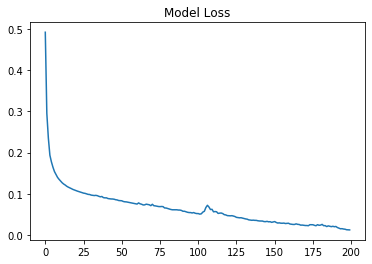

In [62]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.show()

In [63]:
encoder_model = Model(encoder_inputs,encoder_states)

decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_states_inputs = [decoder_state_input_h,decoder_state_input_c]
decoder_outputs,state_h,state_c = decoder_lstm(
        decoder_inputs,initial_state = decoder_states_inputs
)
decoder_states = [state_h,state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)
encoder_model.save('encoder.h5')
decoder_model.save('decoder.h5')

In [ ]:
# Attention inference
attention_layer = Attention(name='attention_layer')
attn_out_res, attn_states_res = attn_layer([inf_decoder_inputs, decoder_res])

In [97]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_dec_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, char2int['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    decoded_list =[]
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = int2char[sampled_token_index]
        decoded_sentence += sampled_char
        decoded_list.append(sampled_char)

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_dec_len):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_dec_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence,decoded_list

In [98]:
seq=encoder_input_data[1:2]

In [99]:
decoded_sentence, lst = decode_sequence(seq)
print(lst)

['โ', 'ร', 'ง', 'พ', 'ย', 'า', 'บ', 'า', 'ล', 'ก', 'ุ', 'ย', 'บ', 'ุ', 'ร', 'ี', '\n']


In [100]:
pred_sent = []
for seq_index in range(num_samples):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence,lst = decode_sequence(input_seq)
    pred_sent.append(lst)
    print('-')
    print('Wrong sentence:', input_texts[seq_index])
    print('Corrected sentence:', decoded_sentence)
    print('Ground Truth:',target_texts[seq_index])

บาลกรุงเทพคริสเตียนนครปฐม

Ground Truth: 	โรงพยาบาลกรุงเทพคริสเตียนนครปฐม

-
Wrong sentence: โรงพยาบาลืพธิฝชัย
Corrected sentence: โรงพยาบาลพุยพิน

Ground Truth: 	โรงพยาบาลโพธิ์ชัย

-
Wrong sentence: โรงพยาบาลด่านช้ใาง
Corrected sentence: โรงพยาบาลด่านช้าง

Ground Truth: 	โรงพยาบาลด่านช้าง

-
Wrong sentence: โรงพยาบาลอู่ทอง
Corrected sentence: โรงพยาบาลอู่ทอง

Ground Truth: 	โรงพยาบาลอู่ทอง

-
Wrong sentence: โรงพยาบาลนครค-ร4สฟมตียน
Corrected sentence: โรงพยาบาลนครคริสเตียน

Ground Truth: 	โรงพยาบาลนครคริสเตียน

-
Wrong sentence: โรงพยาบาลสินแพทย์
Corrected sentence: โรงพยาบาลสินแพทย์

Ground Truth: 	โรงพยาบาลสินแพทย์

-
Wrong sentence: โรงพยาบาลราชคฤกษ์
Corrected sentence: โรงพยาบาลราชพฤกษ์

Ground Truth: 	โรงพยาบาลราชพฤกษ์

-
Wrong sentence: โรงพยาบฉลหลวงพ่อเปิ่น
Corrected sentence: โรงพยาบาลหลวงพ่อเปิ่น

Ground Truth: 	โรงพยาบาลหลวงพ่อเปิ่น

-
Wrong sentence: โรงพยาบาลสมเด็จพรศะบรขราชินีนาถ
Corrected sentence: โรงพยาบาลสมเด็จพระบรมราชินีนาถ

Ground Truth: 	โรงพยาบาลสมเด็จพระบรมราชิน

In [105]:
pred_test_output = []
for txt in pred_sent:
    pred_test_output.append(txt[:-1])

In [112]:
def createSpace_for_cer(text):
    re = []
    for t in text :
        if t != '\n' and t != '\t':
            re.append(t)      
    #re.append("<eow>")
    #pad_list = ["<pad>"]*(max_seq-len(re)+index)
    #re_pad = re + pad_list
    return re

In [113]:
ground_test =[]
for txt in target_texts:
    ground_test.append(createSpace_for_cer(txt))

In [115]:
input_test = []
for txt in input_texts:
    input_test.append(createSpace_for_cer(txt))

In [116]:
from char_error_rate import get_char_error_rate

In [117]:
##### CER predicted text #####
cer = 0
for i,key in enumerate(ground_test):
    cer += get_char_error_rate(ground_test[i],pred_test_output[i])
    #print(get_char_error_rate(ground_test[i],pred_test_output[i]))
cer_mean = cer/len(ground_test)  
print('Character Error Rate for Test Set:{}%'.format(cer_mean))

Character Error Rate for Test Set:3.7010725753658855%


In [118]:
##### CER input texts #####
cer = 0
for i,key in enumerate(ground_test):
    cer += get_char_error_rate(ground_test[i],input_test[i])
    #print(get_char_error_rate(ground_test[i],pred_test_output[i]))
cer_mean = cer/len(ground_test)  
print('Character Error Rate for Test Set:{}%'.format(cer_mean))

Character Error Rate for Test Set:6.883300501982005%


In [91]:
for seq_index in range(100):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Wrong sentence:', input_texts[seq_index])
    print('Corrected sentence:', decoded_sentence)
    print('Ground Truth:',target_texts[seq_index])

-
Wrong sentence: โรงยา"บาีบ้านแพรก
Corrected sentence: โรงพยาบาลบ้านแพรก

Ground Truth: 	โรงพยาบาลบ้านแพรก

-
Wrong sentence: โรงพยาบาลเชียงขวัญ
Corrected sentence: โรงพยาบาลเชียงขวัญ

Ground Truth: 	โรงพยาบาลเชียงขวัญ

-
Wrong sentence: โรพยบาลเขาย-้อย
Corrected sentence: โรงพยาบาลเขาย้อย

Ground Truth: 	โรงพยาบาลเขาย้อย

-
Wrong sentence: โรงพยาบาลศุกถ์ศิดิศรคีสวัสดิ์
Corrected sentence: โรงพยาบาลศุกร์ศิริศรีสวัสดิ์

Ground Truth: 	โรงพยาบาลศุกร์ศิริศรีสวัสดิ์

-
Wrong sentence: โรงพยาบาลหนองหงส์
Corrected sentence: โรงพยาบาลหนองหงส์

Ground Truth: 	โรงพยาบาลหนองหงส์

-
Wrong sentence: โรงพยบาลกะป8งช0ยพัฒน์
Corrected sentence: โรงพยาบาลกะปงชัยพัฒน์

Ground Truth: 	โรงพยาบาลกะปงชัยพัฒน์

-
Wrong sentence: คลินิคเกกษมราษฎ้์ศฌรีบุรินทอ์สาำาอาเภฝจเชียงซแสน
Corrected sentence: คลินิคเกษมราษฎร์ศรีบุรินทร์สาขาอาเภอเชียงแสน

Ground Truth: 	คลินิคเกษมราษฎร์ศรีบุรินทร์สาขาอาเภอเชียงแสน

-
Wrong sentence: โรงพยาบาลบ้านไผ่
Corrected sentence: โรงพยาบาลบ้านไผ่

Ground Truth: 	โรงพยาบาลบ้านไผ่

-

In [93]:
type(encoder_input_data)

numpy.ndarray

In [97]:
print(encoder_input_data.shape)

(194, 52, 90)


In [98]:
print(encoder_outputs.shape)

(None, 512)


In [99]:
print(decoder_outputs.shape)

(None, None, 92)
